# Demo for the DoWhy causal API
We show a simple example of adding a causal extension to any dataframe. 

In [1]:
import dowhy.datasets
import dowhy.api

import numpy as np
import pandas as pd

from statsmodels.api import OLS

In [2]:
data = dowhy.datasets.linear_dataset(beta=5,
        num_common_causes=1,
        num_instruments = 0,
        num_samples=1000,
        treatment_is_binary=True)
df = data['df']
df['y'] = df['y'] + np.random.normal(size=len(df)) # Adding noise to data. Without noise, the variance in Y|X, Z is zero, and mcmc fails.
#data['dot_graph'] = 'digraph { v ->y;X0-> v;X0-> y;}'

treatment= data["treatment_name"][0]
outcome = data["outcome_name"][0]
common_cause = data["common_causes_names"][0]
df

,W0,v0,y
0,0.351416,False,1.770602
1,1.307170,True,6.098464
2,-1.429158,False,-0.416234
3,1.561882,True,7.383313
4,-0.746316,False,0.126371
...,...,...,...
995,-0.317264,False,-0.444288
996,-0.384342,False,1.373162
997,-3.703138,False,-5.521368
998,-0.530284,False,-0.674066


<AxesSubplot:xlabel='v0'>

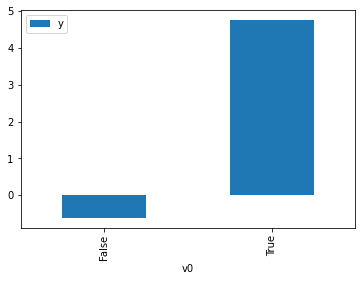

In [3]:
# data['df'] is just a regular pandas.DataFrame
df.causal.do(x=treatment,
                     variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'},
                     outcome=outcome,
                     common_causes=[common_cause],
                     proceed_when_unidentifiable=True).groupby(treatment).mean().plot(y=outcome, kind='bar')

<AxesSubplot:xlabel='v0'>

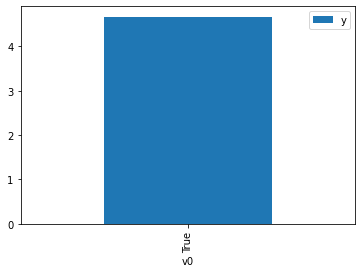

In [4]:
df.causal.do(x={treatment: 1}, 
              variable_types={treatment:'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome,
              method='weighting', 
              common_causes=[common_cause],
              proceed_when_unidentifiable=True).groupby(treatment).mean().plot(y=outcome, kind='bar')

In [5]:
cdf_1 = df.causal.do(x={treatment: 1}, 
              variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome, 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)

cdf_0 = df.causal.do(x={treatment: 0}, 
              variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome, 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)


In [6]:
cdf_0

,W0,v0,y,propensity_score,weight
0,-1.284470,False,-1.385669,0.925169,1.080884
1,0.795281,False,-0.111928,0.146294,6.835559
2,1.486917,False,1.190343,0.039662,25.212908
3,-1.107896,False,-3.000521,0.895806,1.116313
4,-0.596811,False,-0.986136,0.750261,1.332869
...,...,...,...,...,...
995,-0.398276,False,-0.373717,0.666313,1.500796
996,0.173618,False,-0.020477,0.381069,2.624194
997,-0.041073,False,-1.274254,0.489171,2.044276
998,-0.552771,False,-2.036346,0.732903,1.364437


In [7]:
cdf_1

,W0,v0,y,propensity_score,weight
0,-0.969820,True,2.027891,0.133842,7.471486
1,-1.536529,True,0.812138,0.045944,21.765787
2,-1.398063,True,2.279418,0.060175,16.618194
3,0.441375,True,4.470792,0.738053,1.354917
4,-0.660118,True,3.341546,0.226138,4.422085
...,...,...,...,...,...
995,0.257336,True,3.424474,0.658642,1.518276
996,-0.532030,True,4.848077,0.275532,3.629336
997,-0.085724,True,4.059201,0.487868,2.049735
998,0.050890,True,5.275804,0.557870,1.792533


## Comparing the estimate to Linear Regression
First, estimating the effect using the causal data frame, and the 95% confidence interval.

In [8]:
(cdf_1['y'] - cdf_0['y']).mean()

/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/pyth

In [9]:
1.96*(cdf_1['y'] - cdf_0['y']).std() / np.sqrt(len(df))

/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/pyth

Comparing to the estimate from OLS.

In [10]:
model = OLS(np.asarray(df[outcome]), np.asarray(df[[common_cause, treatment]], dtype=np.float64))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              7960.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):                        0.00
Time:                        20:11:16   Log-Likelihood:                         -1415.6
No. Observations:                1000   AIC:                                      2835.
Df Residuals:                     998   BIC:                                      2845.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5066      0.031     48.447      0.000       1.446       1.568
x2             5.0092      0.050     99.802      0.000       4.911       5.108
==============================================================================
Omnibus:                        1.385   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                1.435
Skew:                           0.088   Prob(JB):                        0.488
Kurtosis:                       2.942   Cond. No.                         1.74
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""